# Import libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform, loguniform

In [4]:
%matplotlib inline

# Import data

In [6]:
df = pd.read_csv('DataSets/2.Regression-Salary_Pred-2i 1o.csv')

# Split the data into train and test sets

In [8]:
X = df.drop(columns=["income"],axis=1,inplace=False)
y=df[['income']]

In [9]:
print(X.shape)
print(y.shape)

(20, 2)
(20, 1)


In [10]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(type(X_test))
print(type(y_test))
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Define models

In [14]:
model_Linear = LinearRegression()
model_RedgeL2 = Ridge()
model_LassoL1 = Lasso()
model_ElasticNet = ElasticNet()

# Hyperparameter tuning for Ridge, Lasso, and ElasticNet using GridSearchCV and RandomizedSearchCV


### GridSearchCV 

In [17]:
# Ridge Regression - GridSearchCV

ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(model_RedgeL2, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

ridge_grid_search.fit(X_train, y_train)

y_pred_r2=ridge_grid_search.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_r2)

print(f"Best Ridge Parameters (GridSearchCV): {ridge_grid_search.best_params_}")
print(f"Ridge MSE: {ridge_mse}")


Best Ridge Parameters (GridSearchCV): {'alpha': 0.1}
Ridge MSE: 755111.7632626231


In [18]:
# Lasso Regression - GridSearchCV

lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}

lasso_grid_search = GridSearchCV(model_LassoL1, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_grid_search.fit(X_train, y_train)

y_pred_r1=lasso_grid_search.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_r1)

print(f"Best Lasso Parameters (GridSearchCV): {lasso_grid_search.best_params_}")
print(f"Lasso MSE: {lasso_mse}")

Best Lasso Parameters (GridSearchCV): {'alpha': 0.1}
Lasso MSE: 753801.1407556743


### GridSearchCV & RandomizedSearchCV 

In [20]:
# ElasticNet Regression - GridSearchCV

elastic_net_param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic_net_grid_search = GridSearchCV(model_ElasticNet, elastic_net_param_grid, cv=5, scoring='neg_mean_squared_error')

elastic_net_grid_search.fit(X_train, y_train)

y_pred_EN_Grid=elastic_net_grid_search.predict(X_test)

elastic_net_Grid_mse = mean_squared_error(y_test, y_pred_EN_Grid)

print(f"Best ElasticNet Parameters (GridSearchCV): {elastic_net_grid_search.best_params_}")
print(f"ElasticNet Grid MSE: {elastic_net_Grid_mse}")

print('-'*80)

# -----------------------------------------------------------------------------------------------

# ElasticNet Regression - RandomizedSearchCV 

elastic_net_param_dist = {
    'alpha': loguniform(0.001, 100),
    'l1_ratio': uniform(0, 1)
}
elastic_net_random_search = RandomizedSearchCV(model_ElasticNet, elastic_net_param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

elastic_net_random_search.fit(X_train, y_train)

y_pred_EN_Rand=elastic_net_random_search.predict(X_test)

elastic_net_Rand_mse = mean_squared_error(y_test, y_pred_EN_Rand)

print(f"Best ElasticNet Parameters (RandomizedSearchCV): {elastic_net_random_search.best_params_}")
print(f"ElasticNet Rand MSE: {elastic_net_Rand_mse}")

Best ElasticNet Parameters (GridSearchCV): {'alpha': 0.1, 'l1_ratio': 0.9}
ElasticNet Grid MSE: 755907.7073351264
--------------------------------------------------------------------------------
Best ElasticNet Parameters (RandomizedSearchCV): {'alpha': 0.0023591373063477127, 'l1_ratio': 0.9868869366005173}
ElasticNet Rand MSE: 753803.3684800288


### No Regularization

In [22]:
# Linear Regression (No Regularization)

model_Linear.fit(X_train, y_train)

linear_pred = model_Linear.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_pred)

print(f"Linear Regression MSE: {linear_mse:.4f}")

Linear Regression MSE: 753796.7694


# Visualize results 

In [38]:
mse_values = [linear_mse, ridge_mse, lasso_mse, elastic_net_Grid_mse, elastic_net_Rand_mse]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet (GridSearchCV)', 'ElasticNet (RandomizedSearchCV)']



In [40]:
mse_values

[753796.7693734544,
 755111.7632626231,
 753801.1407556743,
 755907.7073351264,
 753803.3684800288]

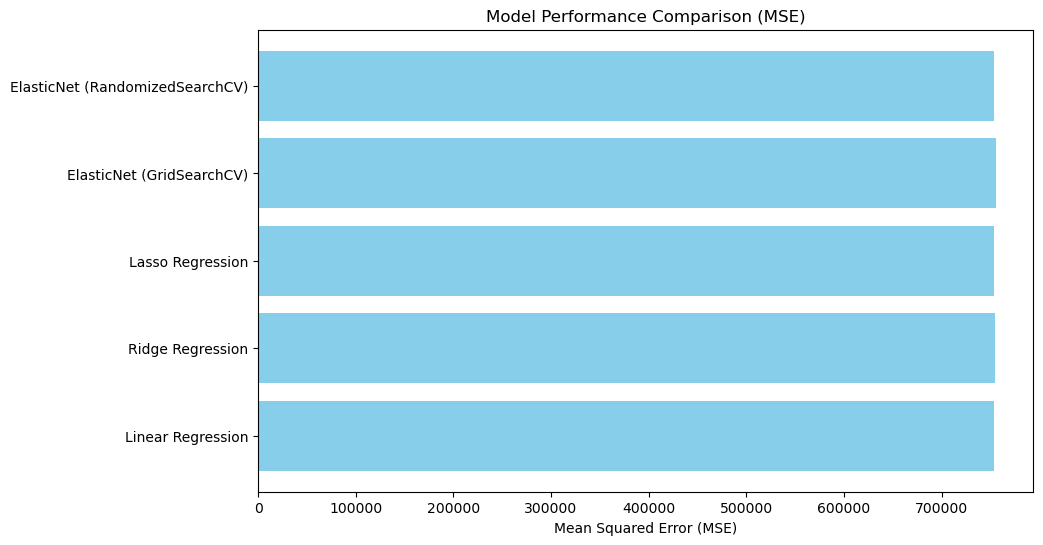

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(labels, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison (MSE)')
plt.show()